<a href="https://colab.research.google.com/github/the-confused-genius/Digit-Recognition/blob/main/8x8_digit_recognition_using_svm_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwrittien Digit Recognition using SVM

## Importing Basic Libraries

In [ ]:
import numpy as np
from sklearn.datasets import load_digits

## Load Dataset

In [ ]:
df = load_digits()

## Summarize Dataset

In [ ]:
print("The data is :",df.data)
print("The target is :",df.target)

print("Shape of the data is :",df.data.shape)
print("Shape of the image :",df.images.shape[1],df.images.shape[2])

dfimagelength = len(df.images)
print("Number of samples are :",dfimagelength)

The data is : [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
The target is : [0 1 2 ... 8 9 8]
Shape of the data is : (1797, 64)
Shape of the image : 8 8
Number of samples are : 1797


## Visualizing the Dataset

<Figure size 432x288 with 0 Axes>

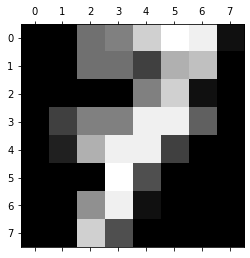

array([[ 0.,  0.,  7.,  8., 13., 16., 15.,  1.],
       [ 0.,  0.,  7.,  7.,  4., 11., 12.,  0.],
       [ 0.,  0.,  0.,  0.,  8., 13.,  1.,  0.],
       [ 0.,  4.,  8.,  8., 15., 15.,  6.,  0.],
       [ 0.,  2., 11., 15., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 15.,  1.,  0.,  0.,  0.],
       [ 0.,  0., 13.,  5.,  0.,  0.,  0.,  0.]])

In [ ]:
n = 7 #sample number to visualize

import matplotlib.pyplot as plt
plt.gray()
plt.matshow(df.images[n])
plt.show()

df.images[n]

## Segregating dataset into x and y 
where x is the independent variable and y is the dependent variable

In [ ]:
x = df.images.reshape(dfimagelength,-1)
y = df.target

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)

(1257, 64)
(540, 64)


## Training the model

In [ ]:
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

## Predicting the digits from Test data

[3]




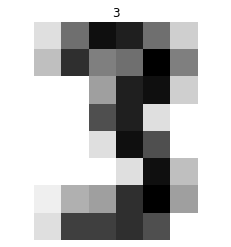

In [ ]:
n = 13
result = model.predict(df.images[n].reshape((1,-1)))
plt.imshow(df.images[n],cmap=plt.cm.gray_r,interpolation='nearest')
print(result)
print("\n")
plt.axis('off')
plt.title('%i'%result)
plt.show()

## Evaluating the model

In [ ]:
y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[2 2]
 [8 8]
 [2 2]
 ...
 [6 6]
 [2 2]
 [9 9]]


In [ ]:
from sklearn.metrics import accuracy_score
print(f'Accuracy of the model is {round(accuracy_score(y_test,y_pred)*100,2)}%')

Accuracy of the model is 97.41%


## Applying Different Methods

In [ ]:
from sklearn import svm
model1 = svm.SVC(kernel='linear')
model2 = svm.SVC(kernel='rbf')
model3 = svm.SVC(gamma=0.001)
model4 = svm.SVC(gamma=0.001,C=0.1)

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)

y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)
y_pred4 = model4.predict(x_test)

print(f'Accuracy of the model 1 is {round(accuracy_score(y_test,y_pred1)*100,2)}%')
print(f'Accuracy of the model 2 is {round(accuracy_score(y_test,y_pred2)*100,2)}%')
print(f'Accuracy of the model 3 is {round(accuracy_score(y_test,y_pred3)*100,2)}%')
print(f'Accuracy of the model 4 is {round(accuracy_score(y_test,y_pred4)*100,2)}%')

Accuracy of the model 1 is 97.41%
Accuracy of the model 2 is 99.07%
Accuracy of the model 3 is 99.26%
Accuracy of the model 4 is 95.56%
